In [1]:
from atomtoolkit import IO
import matplotlib.pyplot as plt
from atomtoolkit import *
import atomtoolkit.render.lineshapes as lineshapes
from atomtoolkit.atom import Atom, Transition
import atomtoolkit.render.spectra as spectra
from pprint import pprint
import numpy as np

In [2]:
resource_path = 'resources'

def load_atom(species, num_levels=None, save=False, B=Q_(0.0, 'G'), load=False):
    if load:
        a = Atom.load(f'atoms/{species}.atom')
    else:
        df = IO.load_NIST_data(speciesdict[species]['species'])
        if 'trans_path' in speciesdict[species]:
            trans_df = IO.load_transition_data(speciesdict[species]['trans_path'], columns={
                "conf_l": "LConfiguration", "conf_u": "UConfiguration",
                "term_l": "LTerm", "term_u": "UTerm", "j_l": "LJ", "j_u": "UJ",
                "A": "A DREAM"}).dropna(subset=['A'])
        else:
            trans_df = None
        a = IO.generate_full_from_dataframe(df, species, speciesdict[species]['I'],
                                            num_levels=num_levels,
                                            B=B,
                                            hf_csv=f'{resource_path}/{species}_Hyperfine.csv',
                                            transitions_df=trans_df,
                                            allowed=0b101)
        if save:
            a.save(f'atoms/{species}.atom')
            a.generate_hf_csv(filename=f'{resource_path}/{species}_Hyperfine.csv')
        print('Generation complete')
    return a

In [3]:
speciesdict = {
    '171Yb': {'species': 'Yb II', 'I': 0.5, 'trans_path': f"{resource_path}/Yb_II_Oscillator_Strengths.csv"},
    '171Yb_2': {'species': 'Yb II', 'I': 0.5},
    '173Yb': {'species': 'Yb II', 'I': 2.5, 'trans_path': f"{resource_path}/Yb_II_Oscillator_Strengths.csv"},
    '138Ba': {'species': 'Ba II', 'I': 0.0},
    '133Ba': {'species': 'Ba II', 'I': 0.5},
    '201Hg': {'species': 'Hg I', 'I': 1.5},
    '9Be': {'species': 'Be II', 'I': 1.5}
}

In [4]:
# whether to load from pickle
load = False
# whether to save the ion
save = False
# Name of the atom
species = '173Yb'
# Number of levels to generate
num_levels = 30
# Magnetic field
B = Q_(5.0, 'G')

a = load_atom(species, load=load, save=save, num_levels=num_levels, B=B)

data finalized: 100%|████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.71it/s]
adding level 4f13.(2F*<5/2>).5d.6s.(3D) 3[9/2]*9/2                                                                     
adding transition 4f14.5d 2D3/2 → 4f14.6p 2P*1/2                                                                       
adding internal transitions to 4f13.(2F*<5/2>).5d.6s.(3D) 3[9/2]*9/2                                                   

Generation complete


In [5]:
t = Transition(a.levels['4f14.6s 2S1/2'], a.levels['4f14.5d 2D5/2'], A=Q_(22, 'Hz'))
t.add_to_atom(a)
t.set_frequency(Q_(729.476090, 'THz'))

a.transitions[('4f14.5d 2D3/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2')].set_frequency(Q_(320.570339, 'THz'))
a.transitions[('4f14.6s 2S1/2', '4f14.6p 2P*1/2')].set_frequency(Q_(812.128235, 'THz'))

In [6]:
# pprint(t.__dict__)

In [7]:
# pprint(list(a.levels.keys()))

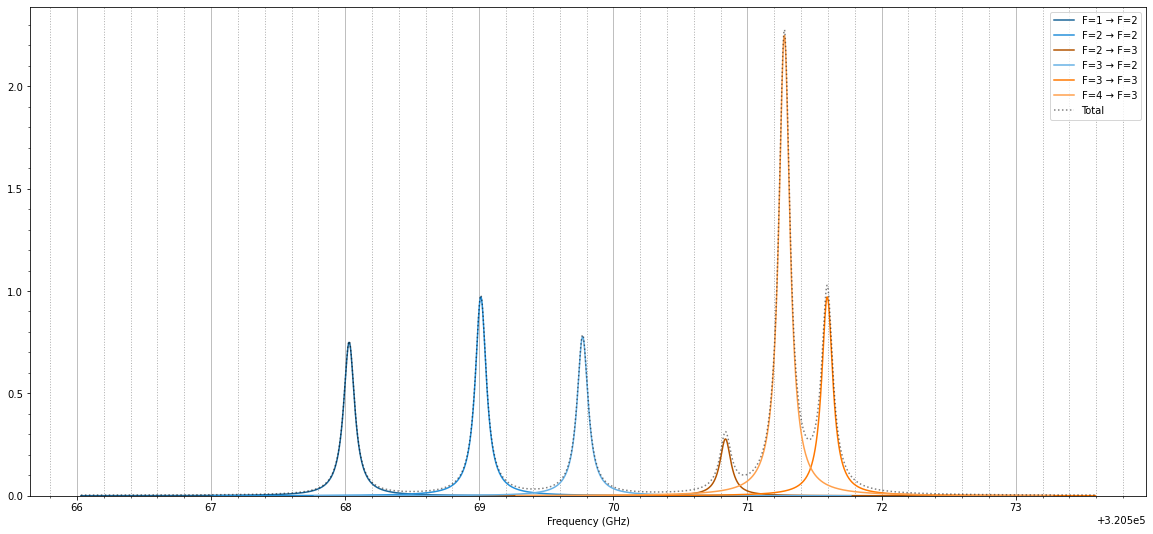

In [8]:
%matplotlib inline
plt.figure(figsize=(20, 9))

lineshape = lineshapes.LorentzianLineShape(gamma=.1)
mod_lineshape = lineshapes.ModLorentzianLineShape(gamma=.1, depth=.2, mod_freq_GHz=0.8)

spectra.plot_hyperfine_spectrum(a.transitions[('4f14.5d 2D3/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2')],
                       lineshape=lineshape, coloring='u', num_points=1000)

ax = plt.gca()
ax.grid(True, 'major', axis='x')
ax.minorticks_on()
ax.grid(True, 'minor', axis='x', linestyle=':', linewidth=1)

plt.savefig('d_state_spectrum.png')
plt.show()

# pprint([(s.name, str(s.freq.to('GHz')), s.rel_strength) for s in a.transitions[('4f14.5d 2D3/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2')].subtransitions()])

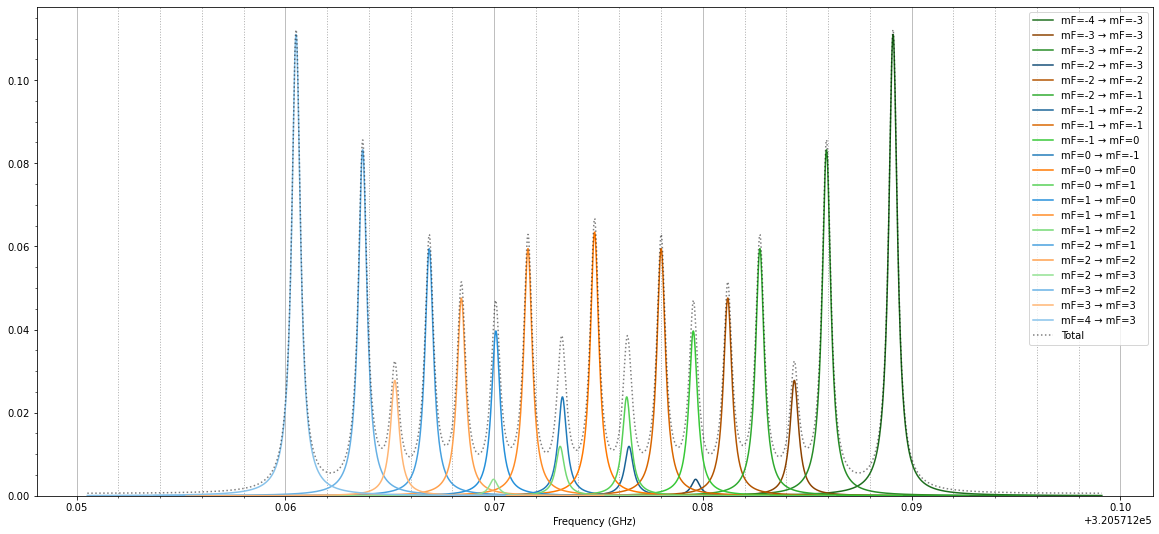

In [9]:
%matplotlib inline

a.B = Q_(5.0, 'G')

plt.figure(figsize=(20, 9))

lineshape = lineshapes.LorentzianLineShape(.0005)
mod_lineshape = lineshapes.ModLorentzianLineShape(gamma=.1, depth=.2, mod_freq_GHz=0.8)

spectra.plot_zeeman_spectrum(a.hftransitions[('4f14.5d 2D3/2 F=4', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3')],
                       lineshape=lineshape, coloring='transition_type', num_points=1000)

ax = plt.gca()
ax.grid(True, 'major', axis='x')
ax.minorticks_on()
ax.grid(True, 'minor', axis='x', linestyle=':', linewidth=1)

plt.savefig('d_state_spectrum.png')
plt.show()

In [9]:
%matplotlib inline

plt.figure(figsize=(20, 9))

lineshape = lineshapes.LorentzianLineShape(gamma=.1)
mod_lineshape = lineshapes.ModLorentzianLineShape(gamma=.15, depth=8, mod_freq_GHz=0.8)

ampl_dict = {'4f14.5d 2D3/2 F=1 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2': 0.,
            '4f14.5d 2D3/2 F=2 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2': 0.2777777777777778, 
            '4f14.5d 2D3/2 F=2 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3': 0.2777777777777778,
            '4f14.5d 2D3/2 F=3 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2': 0.9722222222222222,
            '4f14.5d 2D3/2 F=3 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3': 0.9722222222222222,
            '4f14.5d 2D3/2 F=4 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3': 2.2500000000000004,}

spectra.plot_spectrum(a.transitions[('4f14.5d 2D3/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2')],
                       lineshape=lineshape, coloring='l', num_points=1000, ampl_dict = ampl_dict)
plt.xlim(3.205e5+68.5, 3.205e5+72)

# plt.ylim(0, 6)
ax = plt.gca()
ax.grid(True, 'major', axis='x')
ax.minorticks_on()
ax.grid(True, 'minor', axis='x', linestyle=':', linewidth=1)

plt.savefig('d_state_spectrum_f=3.png')
plt.savefig('predicted.png')
plt.show()


AttributeError: module 'atomtoolkit.render.spectra' has no attribute 'plot_spectrum'

<Figure size 1440x648 with 0 Axes>

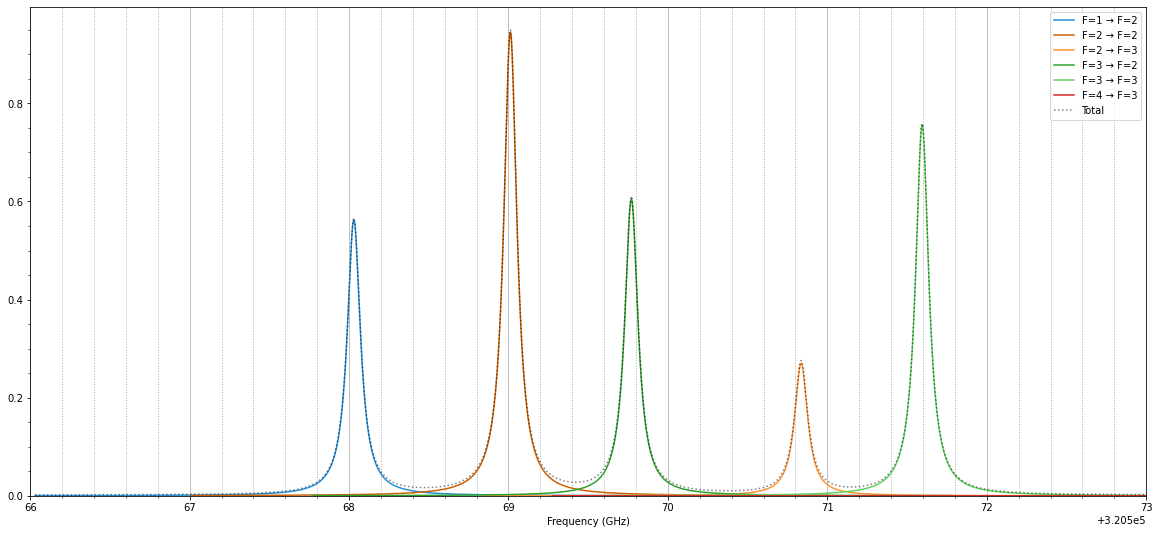

In [101]:
%matplotlib inline

plt.figure(figsize=(20, 9))

lineshape = lineshapes.LorentzianLineShape(gamma=.1)
mod_lineshape = lineshapes.ModLorentzianLineShape(gamma=.5, depth=0, mod_freq_GHz=0.8)

ampl_dict = {'4f14.5d 2D3/2 F=1 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2': 0.7499999999999999,
            '4f14.5d 2D3/2 F=2 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2': 0.9722222222222224, 
            '4f14.5d 2D3/2 F=2 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3': 0.9722222222222224,
            '4f14.5d 2D3/2 F=3 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2': 0.7777777777777778,
            '4f14.5d 2D3/2 F=3 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3': 0.7777777777777778,
            '4f14.5d 2D3/2 F=4 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3': 0.,}


# center = 320570.700
# freq = .850
# lines = [center + x*freq for x in np.arange(-2, 3)]
# print(lines)
# plt.vlines(lines, 0.0, 1.0)

spectra.plot_spectrum(a.transitions[('4f14.5d 2D3/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2')],
                        lineshape=lineshape, coloring='l', num_points=3000, ampl_dict = ampl_dict)


# plt.ylim(0, 6)
plt.xlim(3.205e5+66, 3.205e5+73)
ax = plt.gca()
ax.grid(True, 'major', axis='x')
ax.minorticks_on()

ax.grid(True, 'minor', axis='x', linestyle=':', linewidth=1)


plt.show()

In [107]:
pprint([(s.name, str(s.freq.to('GHz')), s.rel_strength) for s in a.transitions[('4f14.5d 2D3/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2')].subtransitions()])

[('4f14.5d 2D3/2 F=1 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2',
  '320568.0298925 gigahertz',
  0.7499999999999999),
 ('4f14.5d 2D3/2 F=2 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2',
  '320569.01163250004 gigahertz',
  0.9722222222222224),
 ('4f14.5d 2D3/2 F=2 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3',
  '320570.8356325 gigahertz',
  0.2777777777777778),
 ('4f14.5d 2D3/2 F=3 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2',
  '320569.7706925 gigahertz',
  0.7777777777777778),
 ('4f14.5d 2D3/2 F=3 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3',
  '320571.5946925 gigahertz',
  0.9722222222222222),
 ('4f14.5d 2D3/2 F=4 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3',
  '320571.2748125 gigahertz',
  2.2500000000000004)]


In [106]:
pprint([(s.name, str(s.freq.to('THz')), s.rel_strength) for s in a.transitions[('4f14.5d 2D3/2', '4f14.6p 2P*1/2')].subtransitions()])

[('4f14.5d 2D3/2 F=1 → 4f14.6p 2P*1/2 F=2',
  '123.78054002786 terahertz',
  0.7499999999999999),
 ('4f14.5d 2D3/2 F=2 → 4f14.6p 2P*1/2 F=2',
  '123.78152176786 terahertz',
  0.9722222222222224),
 ('4f14.5d 2D3/2 F=2 → 4f14.6p 2P*1/2 F=3',
  '123.77977816786 terahertz',
  0.2777777777777778),
 ('4f14.5d 2D3/2 F=3 → 4f14.6p 2P*1/2 F=2',
  '123.78228082785999 terahertz',
  0.7777777777777778),
 ('4f14.5d 2D3/2 F=3 → 4f14.6p 2P*1/2 F=3',
  '123.78053722786 terahertz',
  0.9722222222222222),
 ('4f14.5d 2D3/2 F=4 → 4f14.6p 2P*1/2 F=3',
  '123.78021734786 terahertz',
  2.2500000000000004)]


In [64]:
p_state_ampls = {s.name: s.rel_strength for s in a.transitions[('4f14.5d 2D3/2', '4f14.6p 2P*1/2')].subtransitions.values()}
p_state_ampls

AttributeError: 'function' object has no attribute 'values'

In [65]:
ampl_dict = {'4f14.5d 2D3/2 F=1 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2': 0.,
            '4f14.5d 2D3/2 F=2 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2': 0.2777777777777778, 
            '4f14.5d 2D3/2 F=2 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3': 0.2777777777777778,
            '4f14.5d 2D3/2 F=3 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2': 0.9722222222222222,
            '4f14.5d 2D3/2 F=3 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3': 0.9722222222222222,
            '4f14.5d 2D3/2 F=4 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3': 2.2500000000000004,}

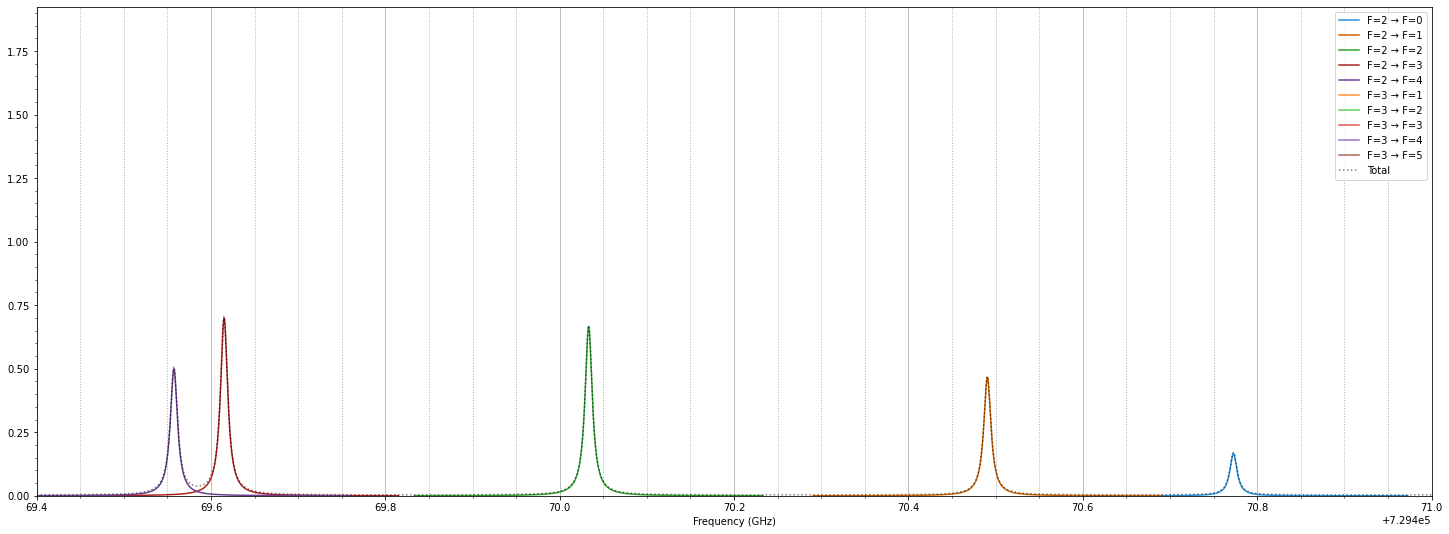

In [77]:
%matplotlib inline

a.B = Q_(4.6, 'G')

plt.figure(figsize=(25, 9))

lineshape = lineshapes.LorentzianLineShape(gamma=.01)

spectra.plot_spectrum(a.transitions[t.model_name],
                       lineshape=lineshape, coloring='u', num_points=1000)

plt.xlim(729469.4, 729471)
# plt.xlim(729479.8, 729481.2)
ax = plt.gca()
ax.grid(True, 'major', axis='x')
ax.minorticks_on()

ax.grid(True, 'minor', axis='x', linestyle=':', linewidth=1)

plt.show()


In [90]:
pprint(a.hflevels['4f14.5d 2D5/2 F=2'].__dict__)

{'_sublevels': {'mF=-1.0': ZLevel(name = 4f14.5d 2D5/2 F=2 mF=-1, level=729476149506098.1 hertz, 0 sublevels),
                'mF=-2.0': ZLevel(name = 4f14.5d 2D5/2 F=2 mF=-2, level=729476145636696.2 hertz, 0 sublevels),
                'mF=0.0': ZLevel(name = 4f14.5d 2D5/2 F=2 mF=0, level=729476153375500.0 hertz, 0 sublevels),
                'mF=1.0': ZLevel(name = 4f14.5d 2D5/2 F=2 mF=1, level=729476157244901.9 hertz, 0 sublevels),
                'mF=2.0': ZLevel(name = 4f14.5d 2D5/2 F=2 mF=2, level=729476161114303.8 hertz, 0 sublevels)},
 'atom': Atom(name=173Yb, I=2.5, levels=[EnergyLevel(name = 4f14.6s 2S1/2, level=0.0 hertz, 2 sublevels), EnergyLevel(name = 4f13.(2F*).6s2 2F*7/2, level=642117970978750.0 hertz, 6 sublevels), EnergyLevel(name = 4f13.(2F*).6s2 2F*5/2, level=946387229754064.0 hertz, 6 sublevels), EnergyLevel(name = 4f14.5d 2D3/2, level=688347466964640.0 hertz, 4 sublevels), EnergyLevel(name = 4f14.5d 2D5/2, level=729476090000000.0 hertz, 6 sublevels), EnergyLevel(

In [91]:
pprint(a.hflevels['4f14.6s 2S1/2 F=2'].__dict__)

{'_sublevels': {'mF=-1.0': ZLevel(name = 4f14.6s 2S1/2 F=2 mF=-1, level=6122314084.799312 hertz, 0 sublevels),
                'mF=-2.0': ZLevel(name = 4f14.6s 2S1/2 F=2 mF=-2, level=6124458029.598623 hertz, 0 sublevels),
                'mF=0.0': ZLevel(name = 4f14.6s 2S1/2 F=2 mF=0, level=6120170140.0 hertz, 0 sublevels),
                'mF=1.0': ZLevel(name = 4f14.6s 2S1/2 F=2 mF=1, level=6118026195.200688 hertz, 0 sublevels),
                'mF=2.0': ZLevel(name = 4f14.6s 2S1/2 F=2 mF=2, level=6115882250.401377 hertz, 0 sublevels)},
 'atom': Atom(name=173Yb, I=2.5, levels=[EnergyLevel(name = 4f14.6s 2S1/2, level=0.0 hertz, 2 sublevels), EnergyLevel(name = 4f13.(2F*).6s2 2F*7/2, level=642117970978750.0 hertz, 6 sublevels), EnergyLevel(name = 4f13.(2F*).6s2 2F*5/2, level=946387229754064.0 hertz, 6 sublevels), EnergyLevel(name = 4f14.5d 2D3/2, level=688347466964640.0 hertz, 4 sublevels), EnergyLevel(name = 4f14.5d 2D5/2, level=729476090000000.0 hertz, 6 sublevels), EnergyLevel(name 